<a href="https://colab.research.google.com/github/Krosent/machine-learning-models/blob/main/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import Dataset

In [13]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

y.reshape(len(y),1)

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [17]:
y = y.reshape(len(y),1)

In [18]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


**Feature Scaling**

In [19]:

from sklearn.preprocessing import StandardScaler
# We cannot use the same Scaler object for both features and dependent variables
# to fit for each other
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

**Training the SVR model**

In [20]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Predicting a new Result**

In [23]:
# We make sure that our value scaled on the same level as our train features
# Also, we make sure that we inverse result to what we expect, since both X and y were scaled. 
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

**Visualizing SVR results**

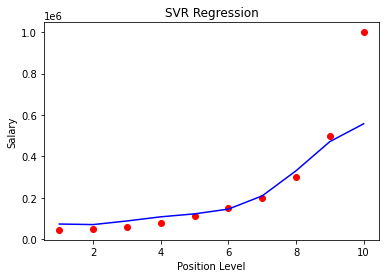

In [24]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color='red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color='blue')
plt.title('SVR Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()